In [240]:
from pathlib import Path
from collections import Counter
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from datetime import datetime
import calendar

In [241]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'raw')

In [255]:
consumer_staples = pd.read_csv(DATA_PATH.joinpath('sp500_consumer_staples.csv'),parse_dates = ["Date"])
consumer_staples = consumer_staples.iloc[::-1]
prices = pd.read_csv(DATA_PATH.joinpath('month_end_prices.csv'),parse_dates = ["datadate"])
t_bill = pd.read_csv(DATA_PATH.joinpath('3_month_t_bill.csv'), parse_dates = ["Date"])
t_bill = t_bill[::-1]

In [256]:
consumer_staples.reset_index(drop = True, inplace = True)
t_bill.reset_index(drop = True, inplace = True)

In [257]:
consumer_staples["datadate"] = [datetime.strptime(consumer_staples.Date[i],'%b %y') for i in range(len(consumer_staples.Date))]

In [258]:
for i in range(len(consumer_staples.datadate)):
    dayr = calendar.monthrange(consumer_staples.datadate[i].year,consumer_staples.datadate[i].month)[1]
    consumer_staples["datadate"][i] = consumer_staples.datadate[i].replace(day = dayr)

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [260]:
t_bill["datadate"] = [datetime.strptime(t_bill.Date[i],'%b %y') for i in range(len(t_bill.Date))]
for i in range(len(consumer_staples.datadate)):
    dayr = calendar.monthrange(t_bill.datadate[i].year,t_bill.datadate[i].month)[1]
    t_bill["datadate"][i] = t_bill.datadate[i].replace(day = dayr)

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [261]:
def get_bad_data(prices):
    bad_data = list()
    for ticker in prices.tic.unique():
        subset = prices[prices.tic==ticker]
        current = 'na' if np.isnan(subset.prccm.iloc[0]) else 'val'
        for v in subset.prccm[1:]:
            if not np.isnan(v):
                current = 'val'
            elif current == 'val' and np.isnan(v):
                bad_data.append((ticker, subset.conm.iloc[0]))
                continue
    return Counter(bad_data)

In [286]:
bad_dat_count = get_bad_data(prices)

In [265]:
prices['chng'] = prices.prccm.pct_change()

In [266]:
prices.head()

,gvkey,iid,datadate,tic,cusip,conm,prccm,exchg,secstat,tpci,cik,fic,chng
0,1213,01,2000-01-31,ABF,009269101,AIRBORNE INC,19.5625,11,I,0,3000.0,USA,NaN
1,1213,01,2000-02-29,ABF,009269101,AIRBORNE INC,18.5000,11,I,0,3000.0,USA,-0.054313
2,1213,01,2000-03-31,ABF,009269101,AIRBORNE INC,24.0000,11,I,0,3000.0,USA,0.297297
3,1213,01,2000-04-30,ABF,009269101,AIRBORNE INC,21.4375,11,I,0,3000.0,USA,-0.106771
4,1213,01,2000-05-31,ABF,009269101,AIRBORNE INC,20.1875,11,I,0,3000.0,USA,-0.058309


In [267]:
consumer_staples['chng'] = consumer_staples.Price.pct_change()

In [268]:
consumer_staples.head()

,Date,Price,Open,High,Low,Vol.,Change %,datadate,chng
0,Jan 00,193.87,193.87,193.87,193.87,-,-6.82%,2000-01-31,NaN
1,Feb 00,174.01,174.01,174.01,174.01,-,-10.24%,2000-02-29,-0.102440
2,Mar 00,171.55,171.55,171.55,171.55,-,-1.41%,2000-03-31,-0.014137
3,Apr 00,175.73,175.73,175.73,175.73,-,2.44%,2000-04-30,0.024366
4,May 00,192.32,192.32,192.32,192.32,-,9.44%,2000-05-31,0.094406


In [269]:
consumer_staples['excess'] = consumer_staples.chng - t_bill.Price/100

In [126]:
consumer_staples.excess.mean()

-0.009783040046646936

In [19]:
prices.head()

,gvkey,iid,datadate,tic,cusip,conm,prccm,exchg,secstat,tpci,cik,fic,chng
0,1213,01,20000131,ABF,009269101,AIRBORNE INC,19.5625,11,I,0,3000.0,USA,NaN
1,1213,01,20000229,ABF,009269101,AIRBORNE INC,18.5000,11,I,0,3000.0,USA,-0.054313
2,1213,01,20000331,ABF,009269101,AIRBORNE INC,24.0000,11,I,0,3000.0,USA,0.297297
3,1213,01,20000430,ABF,009269101,AIRBORNE INC,21.4375,11,I,0,3000.0,USA,-0.106771
4,1213,01,20000531,ABF,009269101,AIRBORNE INC,20.1875,11,I,0,3000.0,USA,-0.058309


In [120]:
consumer_staples.head()

,Date,Price,Open,High,Low,Vol.,Change %
255,Jan 00,193.87,193.87,193.87,193.87,-,-6.82%
254,Feb 00,174.01,174.01,174.01,174.01,-,-10.24%
253,Mar 00,171.55,171.55,171.55,171.55,-,-1.41%
252,Apr 00,175.73,175.73,175.73,175.73,-,2.44%
251,May 00,192.32,192.32,192.32,192.32,-,9.44%


In [149]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76142 entries, 0 to 76141
Data columns (total 12 columns):
gvkey       76142 non-null int64
iid         76142 non-null object
datadate    76142 non-null datetime64[ns]
tic         76142 non-null object
cusip       76142 non-null object
conm        76142 non-null object
prccm       74250 non-null float64
exchg       76142 non-null int64
secstat     76142 non-null object
tpci        76142 non-null object
cik         75019 non-null float64
fic         76142 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 7.0+ MB


In [153]:
consumer_staples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
Date        256 non-null object
Price       256 non-null float64
Open        256 non-null float64
High        256 non-null float64
Low         256 non-null float64
Vol.        256 non-null object
Change %    256 non-null object
chng        255 non-null float64
excess      255 non-null float64
datadate    256 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 20.1+ KB


In [280]:
ex = (prices.merge(consumer_staples,how='left', on = "datadate", suffixes = ('','_cs'))).merge(t_bill,how='left', on = "datadate", suffixes = ('','_tb'))

In [301]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76142 entries, 0 to 76141
Data columns (total 28 columns):
gvkey          76142 non-null int64
iid            76142 non-null object
datadate       76142 non-null datetime64[ns]
tic            76142 non-null object
cusip          76142 non-null object
conm           76142 non-null object
prccm          74250 non-null float64
exchg          76142 non-null int64
secstat        76142 non-null object
tpci           76142 non-null object
cik            75019 non-null float64
fic            76142 non-null object
chng           76141 non-null float64
Date           76142 non-null object
Price          76142 non-null float64
Open           76142 non-null float64
High           76142 non-null float64
Low            76142 non-null float64
Vol.           76142 non-null object
Change %       76142 non-null object
chng_cs        75872 non-null float64
excess         75872 non-null float64
Date_tb        76142 non-null object
Price_tb       76142 non-

In [326]:
capm = []
for tic in np.unique(ex["tic"]):
    try:
        temp_df = ex[ex["tic"] == tic][1:]
        temp_df = temp_df.reset_index(drop = True)
        if not (tic, temp_df["conm"][0]) in bad_dat_count:
            Y = temp_df["chng"]-(temp_df["Price_tb"]/100)
            X = temp_df["excess"]
            model = OLS(Y,sm.tools.add_constant(X)).fit()
            capm.append((tic,model.params,model.pvalues))
    except:
        continue
    

/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [341]:
pvalues = []
for i in capm:
    try:
        pvalues.append(i[2][1])
    except:
        continue


/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/siddharthkantamneni/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([309.,  11.,  12.,   7.,   6.,   6.,   7.,   8.,   4.,   7.]),
 array([4.42713964e-52, 9.46309587e-02, 1.89261917e-01, 2.83892876e-01,
        3.78523835e-01, 4.73154793e-01, 5.67785752e-01, 6.62416711e-01,
        7.57047669e-01, 8.51678628e-01, 9.46309587e-01]),
 <a list of 10 Patch objects>)

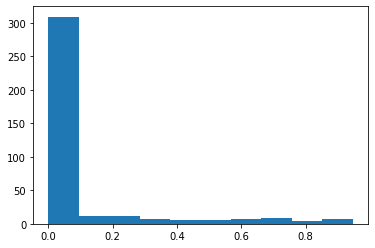

In [343]:
plt.hist(pvalues)

In [344]:
11.+ 12.+   7.+6.+   6.+   7.+   8.+  4.+  7.

68.0